In [40]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [41]:
# File to Load (Remember to change these)

# Read the City and Ride Data
city_data_to_load="data/city-data.csv"
ride_data_to_load="data/ride_data.csv"

city_data_df=pd.read_csv(city_data_to_load).dropna()
ride_data_df=pd.read_csv(ride_data_to_load).dropna()



In [42]:
# Combine the data into a single dataset

# Display the data table for preview
combined_rideshare_df=pd.merge(city_data_df, ride_data_df, how='right', on='city')                                        
combined_rideshare_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


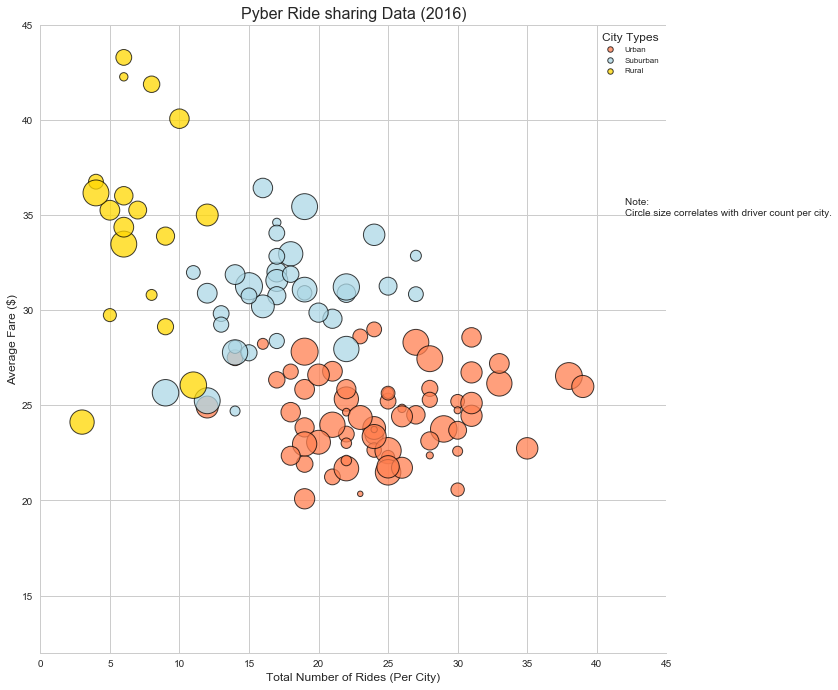

In [122]:
#Bubble Plot of Ride Sharing Data
#-------------------------------
#  Generate bubble plot 
#-------------------------------

# x: count of rides per city
x_list = combined_rideshare_df.groupby(by='city')['ride_id'].count()
# y: average fare in each city
y_list = round(combined_rideshare_df.groupby(by='city')['fare'].mean(),2)
# z: driver count for each city
z_list = combined_rideshare_df.drop_duplicates(subset='city', keep='first').set_index('city')['driver_count']*10
# color: based on the type for each city
type_list = combined_rideshare_df.drop_duplicates(subset='city', keep='first').set_index('city')['type']

# create dataframe to work with
bubbleData_df = pd.DataFrame({'x':x_list,'y':y_list,'z':z_list,'City Type':type_list})
# create color list
color_list = {'Urban':'coral', 'Suburban':'lightblue', 'Rural':'gold'}



# create scatterplot
sns.set(style='whitegrid', context='notebook')
bubblePlot=sns.lmplot(x='x', y='y', data=bubbleData_df,hue='City Type',palette=color_list, \
                      fit_reg=False, size=9.5,\
                      legend=False,legend_out=False,\
                      scatter_kws={'s':z_list, 'alpha':0.75, 'edgecolors':'black', 'linewidths':1})
plt.xlim(0,45)
plt.ylim(12,45)
plt.title("Pyber Ride sharing Data (2016)",{'fontname':'Arial','fontsize':16})
plt.xlabel("Total Number of Rides (Per City)",{'fontname':'Arial','fontsize':12})
plt.ylabel("Average Fare ($)",{'fontname':'Arial','fontsize':12})
# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save figure with the parameter bbox_inches to fit the whole image
plt.savefig("data/PyberRideSharingData.png", bbox_inches="tight")

plt.show()


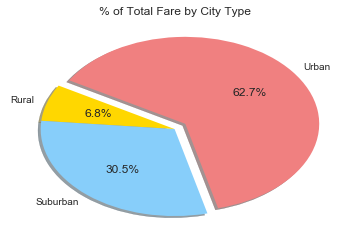

In [112]:
#Total Fares by City Type
#---------------------------------------------
#  Generate fare by city type pie chart
#---------------------------------------------
#group by type
type_groupped = combined_rideshare_df.groupby(['type'])

# Calculate Type Percents
fare_sum = type_groupped['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fare by City Type")

# Save Figure
plt.savefig("data/TotalfarebyCityType.png")

# Show Figure
plt.show()


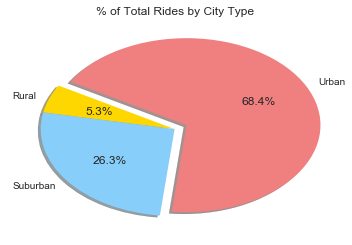

In [110]:
#Total Rides by City Type
#---------------------------------------------
#  Generate rides by city type pie chart
#---------------------------------------------
# create dataframe
# Calculate Type Percents
rides_count = type_groupped['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("data/TotalRidesbyCityType.png")

# Show Figure
plt.show()


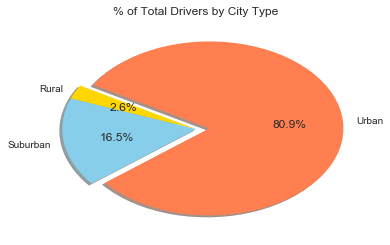

In [108]:
#Total Drivers by City Type
# Calculate Type Percents
type_groupped = combined_rideshare_df.groupby(['type'])
type_groupped_drivers = city_data_df.groupby(['type'])
drivers_sum = type_groupped_drivers['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("data/pyberdriverbyCity.png")

# Show Figure
plt.show()